<a href="https://colab.research.google.com/github/salim4n/kaggle_competition/blob/main/Test_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [3]:
imdb_sentence = []
imdb_labels = []

In [4]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews',split='train'))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteH743IV/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteH743IV/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteH743IV/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
for item in train_data:
  imdb_sentence.append(str(item['text']))
  imdb_labels.append(item['label'])

In [6]:
len(imdb_sentence)

25000

In [7]:
len(imdb_labels)

25000

In [8]:
training_sentences = imdb_sentence[:20000]
test_sentences = imdb_sentence[20000:]

training_labels = imdb_labels[:20000]
test_labels = imdb_labels[20000:]

## Tokenisation



In [9]:
phrase = 'Salut tout le monde'

In [10]:
phrase.split(" ")

['Salut', 'tout', 'le', 'monde']

In [11]:
phrases = ["Salut tout le monde", "comment ça va ?"]

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
tokenizer = Tokenizer()

In [14]:
tokenizer.fit_on_texts(phrases)

In [15]:
tokenizer.word_index

{'salut': 1, 'tout': 2, 'le': 3, 'monde': 4, 'comment': 5, 'ça': 6, 'va': 7}

In [16]:
tokenizer.index_word

{1: 'salut', 2: 'tout', 3: 'le', 4: 'monde', 5: 'comment', 6: 'ça', 7: 'va'}

In [17]:
tokenizer.texts_to_sequences(phrases)

[[1, 2, 3, 4], [5, 6, 7]]

In [18]:
tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(phrases)

In [19]:
tokenizer.word_index

{'<OOV>': 1,
 'salut': 2,
 'tout': 3,
 'le': 4,
 'monde': 5,
 'comment': 6,
 'ça': 7,
 'va': 8}

## Padding

In [20]:
phrases = ["Je suis au marché",
           "Je travaille au marché",
           "es-tu rentré du marché?",
           "Je nettoie le marché tous les jours avant de commencer à vendre le matin"]


tokenizer = Tokenizer(num_words = 100, oov_token="")
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)

In [21]:
sequences

[[3, 6, 4, 2],
 [3, 7, 4, 2],
 [8, 9, 10, 11, 2],
 [3, 12, 5, 2, 13, 14, 15, 16, 17, 18, 19, 20, 5, 21]]

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
pad_sequences(sequences, padding='post', maxlen=7,truncating='post')

array([[ 3,  6,  4,  2,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0],
       [ 3, 12,  5,  2, 13, 14, 15]], dtype=int32)

## Stop Words : indice (package nltk)

In [24]:
stopwords = ['au','le']
phrases = "Je vais au marché jeudi"

In [25]:
words = phrases.split(' ')
phrase_reborn = []

for word in words:
  if word not in stopwords:
    phrase_reborn.append(word)

In [26]:
phrase_reborn

['Je', 'vais', 'marché', 'jeudi']

In [27]:
" ".join(phrase_reborn)

'Je vais marché jeudi'

## Approche du calcul de sentiment

---



In [28]:
phrase = "Votre connexion est agréablement lente"

In [29]:
{"Votre": [1, 0, 5],
 "connexion": [0, 1, 9],
 "est": [3, 2, 3],
 "agréablement": [2, 3, 12],
 "lente": [5, 4, 5]}

{'Votre': [1, 0, 5],
 'connexion': [0, 1, 9],
 'est': [3, 2, 3],
 'agréablement': [2, 3, 12],
 'lente': [5, 4, 5]}

## Embedding (plongement)

In [30]:
training_sentences[42]

'b\'One of the weaker Carry On adventures sees Sid James as the head of a crime gang stealing contraceptive pills. The fourth of the series to be hospital-based, it\\\'s possibly the least of the genre. There\\\'s a curiously flat feel throughout, with all seemingly squandered on below-par material. This is far from the late-70s nadir, but Williams, James, Bresslaw, Maynard et al. are all class performers yet not given the backing of a script equal to their ability.<br /><br />Most of the gags are onrunning, rather than episodic as Carry Ons usually are. So that instead of the traditional hit and miss ratio, if you don\\\'t find the joke funny in the first place you\\\'re stuck with it for most of the film. These continuous plot strands include Williams \\xc2\\x96 for no good reason \\xc2\\x96 worrying that he\\\'s changing sex, and Kenneth Cope in drag. Like the stagy physical pratt falls, the whole thing feels more contrived than in other movies, and lacking in cast interest. Continu

In [31]:
tokenizer = Tokenizer(num_words=20000,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sentences,padding="post",
                                maxlen=15, truncating='post')

test_sentences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sentences,padding="post",
                                maxlen=15, truncating='post')

In [32]:
training_padded[42]

array([4668,    5,    2, 5838, 1706,   22, 2438, 1117, 5099,  594,   15,
          2,  423,    5,    4], dtype=int32)

In [33]:
import numpy as np

In [34]:
training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(20000,20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400000    
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400,177
Trainable params: 400,177
Non-trainable params: 0
_________________________________________________________________


In [37]:

model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [38]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)

In [ ]:
h = model.fit(training_padded, training_labels,
              epochs=50, validation_data=(test_padded,test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.6406 - accuracy: 0.6429 - val_loss: 0.5903 - val_accuracy: 0.6820
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.5023 - accuracy: 0.7607 - val_loss: 0.5820 - val_accuracy: 0.6954
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 0.4217 - accuracy: 0.8105 - val_loss: 0.6117 - val_accuracy: 0.6942
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3707 - accuracy: 0.8382 - val_loss: 0.6546 - val_accuracy: 0.6886
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3340 - accuracy: 0.8589 - val_loss: 0.7024 - val_accuracy: 0.6830
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3078 - accuracy: 0.8715 - val_loss: 0.7474 - val_accuracy: 0.6842


In [58]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


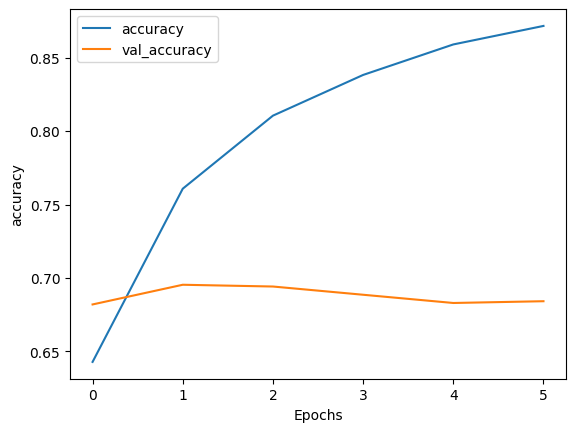

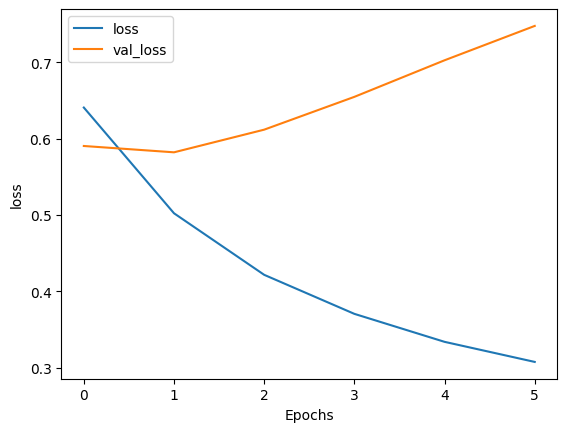

In [ ]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

In [39]:
wc = tokenizer.word_counts

In [40]:
wc = sorted(wc.items(), key=lambda t:t[1], reverse=True)

In [41]:
import pandas as pd

In [42]:
df = pd.DataFrame(wc, columns=['mots','frequence'])

In [ ]:
df[df['frequence'] > 100]

## Transfert Learning

In [44]:
!pip install --upgrade tensorflow_hub

In [46]:
import tensorflow_hub as hub

In [47]:
embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat is on the mat","dog is in the fog"])

In [48]:
embeddings.shape

TensorShape([2, 20])

In [54]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [55]:
training_sentences = train_examples[:20000]
training_labels = train_labels[:20000]

test_sentences = train_examples[20000:]
test_labels = train_labels[20000:]


In [51]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1",
                   output_shape=[20],
                   input_shape=[],
                   dtype=tf.string)

In [52]:
model = tf.keras.models.Sequential([
    hub_layer,
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [57]:
h = model.fit(training_sentences, training_labels,
              epochs=50, validation_data=(test_sentences,test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.6602 - accuracy: 0.6557 - val_loss: 0.5832 - val_accuracy: 0.6958
Epoch 2/50
625/625 [==============================] - 5s 7ms/step - loss: 0.5884 - accuracy: 0.6884 - val_loss: 0.5674 - val_accuracy: 0.7060
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5757 - accuracy: 0.7007 - val_loss: 0.5575 - val_accuracy: 0.7098
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.5671 - accuracy: 0.7074 - val_loss: 0.5513 - val_accuracy: 0.7190
Epoch 5/50
625/625 [==============================] - 5s 9ms/step - loss: 0.5612 - accuracy: 0.7131 - val_loss: 0.5526 - val_accuracy: 0.7152
Epoch 6/50
625/625 [==============================] - 6s 10ms/step - loss: 0.5569 - accuracy: 0.7174 - val_loss: 0.5485 - val_accuracy: 0.7162
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.5547 - accuracy: 0.7171 - val_loss: 0.5517 - val_accuracy: 0.7132
Epoch

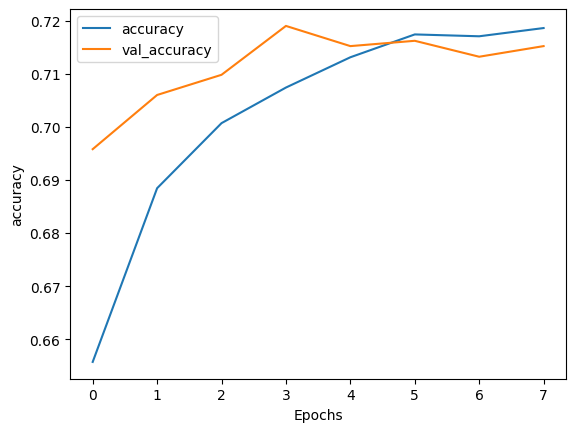

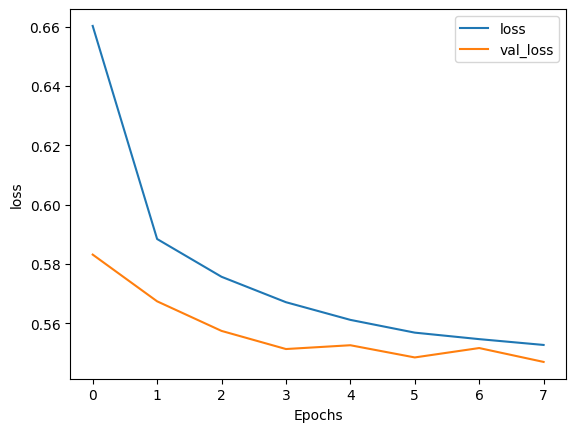

In [59]:
plot_graphs(h, "accuracy")
plot_graphs(h, "loss")